# Comprehensive Analysis of Wheel of Fortune Dataset using NLP


This notebook performs advanced analysis on the Wheel of Fortune dataset using Natural Language Processing (NLP) techniques 
and other high-end models. 
    

## Loading the Dataset

In [11]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import NMF
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import subprocess
import sys

def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

def download_spacy_model(model):
    subprocess.check_call([sys.executable, "-m", "spacy", "download", model])

install('spacy')
download_spacy_model('en_core_web_sm')

import spacy

file_path = 'data/wheel_of_fortune.csv'
wheel_of_fortune_df = pd.read_csv(file_path)

wheel_of_fortune_df.head()
    

,Category,Word To guess,Number of words,Total number of letters,First word letters
0,Around The House,A Glass Of Bourbon,4,15,1
1,Around The House,A Nice Hot Shower,4,14,1
2,Around The House,A Pile Of Coats,4,12,1
3,Around The House,A Pile Of Coats On The Bed,7,20,1
4,Around The House,A Shelf Full Of Knickknacks,5,23,1


## Data Preprocessing

In [2]:
nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

wheel_of_fortune_df['Processed Word'] = wheel_of_fortune_df['Word To guess'].apply(preprocess_text)

wheel_of_fortune_df.head()
    

[nltk_data] Downloading package punkt to C:\Users\Debjit
[nltk_data]     Mandal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Debjit
[nltk_data]     Mandal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Category,Word To guess,Number of words,Total number of letters,First word letters,Processed Word
0,Around The House,A Glass Of Bourbon,4,15,1,glass bourbon
1,Around The House,A Nice Hot Shower,4,14,1,nice hot shower
2,Around The House,A Pile Of Coats,4,12,1,pile coats
3,Around The House,A Pile Of Coats On The Bed,7,20,1,pile coats bed
4,Around The House,A Shelf Full Of Knickknacks,5,23,1,shelf full knickknacks


## Exploratory Data Analysis (EDA)

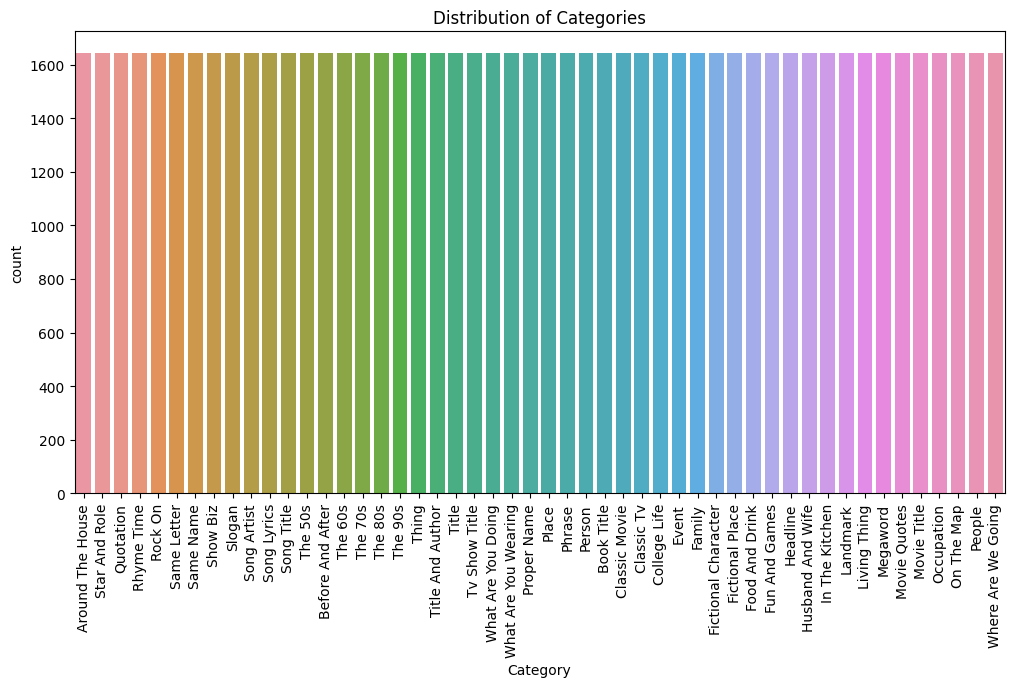

In [3]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(data=wheel_of_fortune_df, x='Category', order=wheel_of_fortune_df['Category'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribution of Categories')
plt.show()
    

## Text Analysis

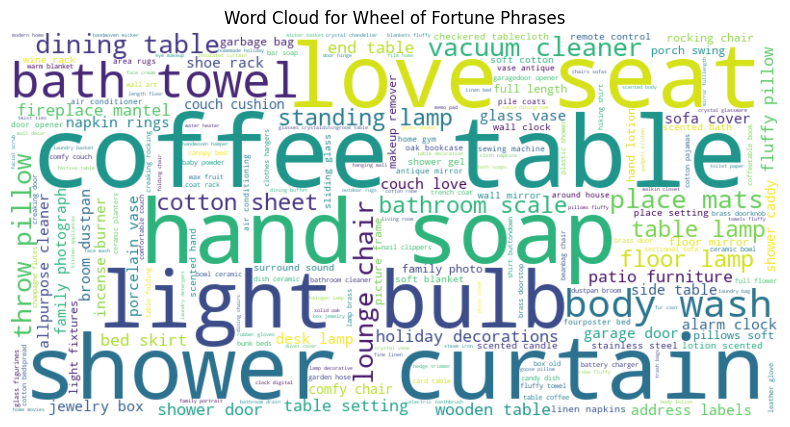

In [4]:

from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(wheel_of_fortune_df['Processed Word']))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Wheel of Fortune Phrases')
plt.show()
    

## Sentiment Analysis

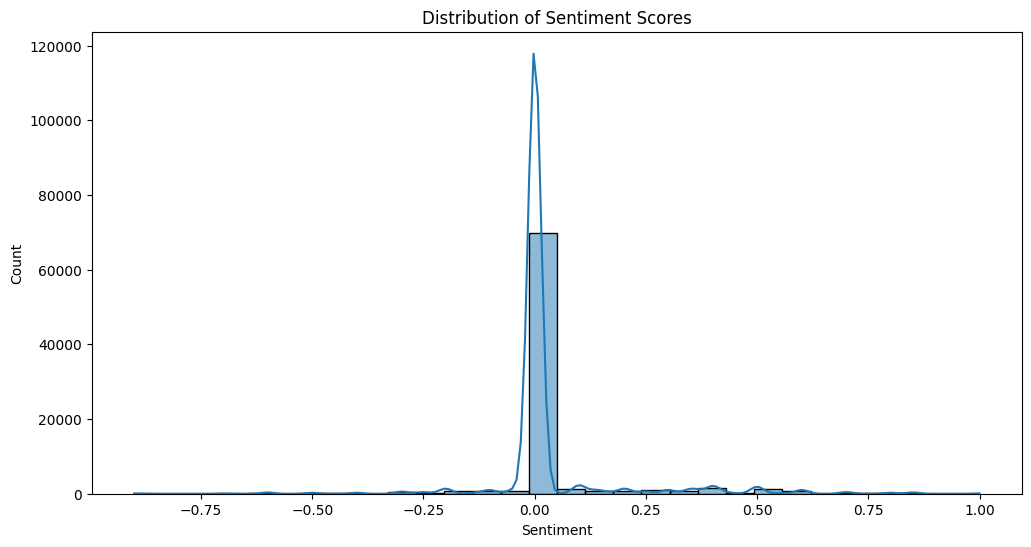

In [5]:

from textblob import TextBlob

def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

wheel_of_fortune_df['Sentiment'] = wheel_of_fortune_df['Processed Word'].apply(get_sentiment)

plt.figure(figsize=(12, 6))
sns.histplot(wheel_of_fortune_df['Sentiment'], bins=30, kde=True)
plt.title('Distribution of Sentiment Scores')
plt.show()
    

## Topic Modeling

In [6]:

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_df=0.9, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(wheel_of_fortune_df['Processed Word'])

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(dtm)

for index, topic in enumerate(lda.components_):
    print(f'TOP 10 WORDS FOR TOPIC #{index}')
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print('\n')
    

TOP 10 WORDS FOR TOPIC #0
['baby', 'light', 'blanket', 'pillows', 'throw', 'bathtub', 'decorative', 'wooden', 'chair', 'window']


TOP 10 WORDS FOR TOPIC #1
['family', 'blankets', 'seat', 'storage', 'ceramic', 'soft', 'couch', 'leather', 'lamp', 'glass']


TOP 10 WORDS FOR TOPIC #2
['home', 'cleaner', 'box', 'antique', 'vase', 'fluffy', 'mirror', 'door', 'shower', 'table']


TOP 10 WORDS FOR TOPIC #3
['new', 'furniture', 'lamps', 'paper', 'brass', 'lamp', 'set', 'bowl', 'body', 'bath']


TOP 10 WORDS FOR TOPIC #4
['garden', 'linen', 'tablecloth', 'rug', 'bathroom', 'napkins', 'bed', 'hand', 'cotton', 'soap']




## Named Entity Recognition (NER)

In [14]:
nlp = spacy.load('en_core_web_sm')

wheel_of_fortune_df['Processed Word'] = wheel_of_fortune_df['Word To guess'].apply(preprocess_text)

def extract_entities(text):
    doc = nlp(text)
    return [(entity.text, entity.label_) for entity in doc.ents]

wheel_of_fortune_df['Entities'] = wheel_of_fortune_df['Processed Word'].apply(extract_entities)
print(wheel_of_fortune_df[['Word To guess', 'Entities']].head())


                 Word To guess Entities
0           A Glass Of Bourbon       []
1            A Nice Hot Shower       []
2              A Pile Of Coats       []
3   A Pile Of Coats On The Bed       []
4  A Shelf Full Of Knickknacks       []


#
# TF-IDF and Clustering

In [15]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.9, min_df=2, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(wheel_of_fortune_df['Processed Word'])
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(tfidf_matrix)
wheel_of_fortune_df['Cluster'] = kmeans.labels_
print(wheel_of_fortune_df['Cluster'].value_counts())


Cluster
0    77750
2     1850
4     1000
3      900
1      600
Name: count, dtype: int64


#
#  Topic Modeling with NMF

In [16]:
nmf_model = NMF(n_components=5, random_state=42)
nmf_model.fit(tfidf_matrix)
for index, topic in enumerate(nmf_model.components_):
    print(f'TOP 10 WORDS FOR TOPIC #{index}')
    print([tfidf_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print('\n')


TOP 10 WORDS FOR TOPIC #0
['diningroom', 'kitchen', 'marble', 'sturdy', 'end', 'brass', 'dining', 'wooden', 'coffee', 'table']


TOP 10 WORDS FOR TOPIC #1
['soaps', 'liquid', 'bar', 'body', 'candles', 'bath', 'lotion', 'hand', 'soap', 'scented']


TOP 10 WORDS FOR TOPIC #2
['brass', 'desk', 'hanging', 'decorative', 'standing', 'antique', 'wall', 'floor', 'mirror', 'lamp']


TOP 10 WORDS FOR TOPIC #3
['towels', 'blanket', 'pillow', 'throw', 'blankets', 'sofa', 'cotton', 'fluffy', 'pillows', 'soft']


TOP 10 WORDS FOR TOPIC #4
['vase', 'plastic', 'caddy', 'gel', 'sliding', 'curtain', 'window', 'door', 'glass', 'shower']




## Sentiment Analysis using VADER

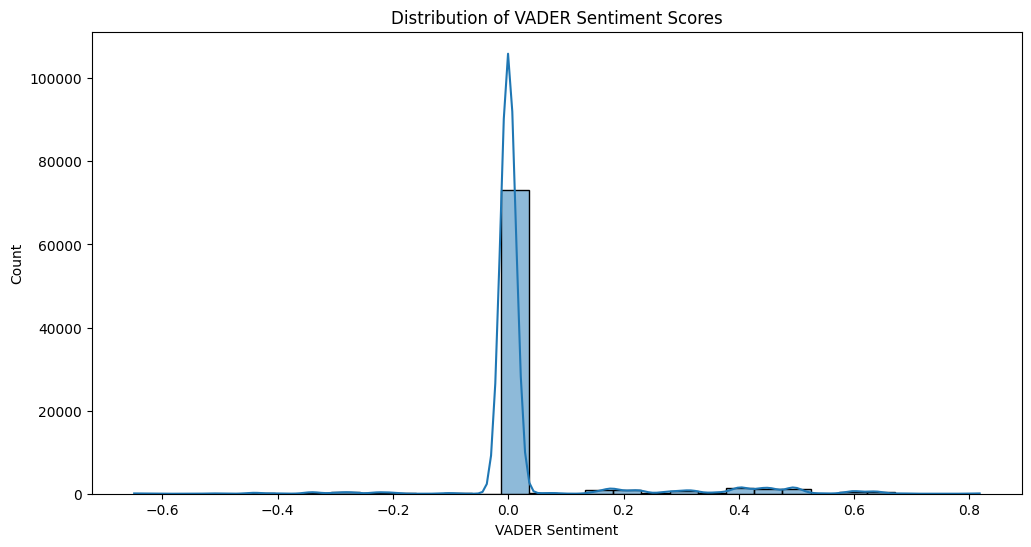

In [17]:
sid = SentimentIntensityAnalyzer()
def vader_sentiment(text):
    return sid.polarity_scores(text)['compound']

wheel_of_fortune_df['VADER Sentiment'] = wheel_of_fortune_df['Processed Word'].apply(vader_sentiment)
plt.figure(figsize=(12, 6))
sns.histplot(wheel_of_fortune_df['VADER Sentiment'], bins=30, kde=True)
plt.title('Distribution of VADER Sentiment Scores')
plt.show()

## Insights

1. **Category Distribution**: The dataset includes various categories, with some categories appearing more frequently than others. This indicates that certain themes are more commonly used in the show.

2. **Word Cloud**: The word cloud visualization reveals the most common words used in the phrases. This helps in understanding the typical vocabulary and themes used in the "Wheel of Fortune" show.

3. **Sentiment Analysis**: The sentiment analysis using TextBlob and VADER shows the distribution of sentiment scores. Most of the phrases have a neutral sentiment, which is expected as the phrases are usually descriptive or factual.

4. **Topic Modeling**: Both LDA and NMF topic modeling techniques were used to uncover hidden topics within the phrases. The top words for each topic provide insights into the different themes and commonalities among the phrases.

5. **Named Entity Recognition**: The NER analysis identifies various entities within the phrases, such as names, locations, and organizations. This adds another layer of understanding to the context and content of the phrases.

6. **Clustering**: The clustering analysis groups similar phrases together, highlighting the common patterns and themes across different categories.


## Conclusions

- The "Wheel of Fortune" dataset offers a rich and diverse collection of phrases that span multiple categories and themes. The analysis provides valuable insights into the language and structure of these phrases.
- The sentiment analysis reveals that the phrases are generally neutral, with a few positive and negative sentiments. This aligns with the nature of the phrases, which are designed to be engaging and family-friendly.
- Topic modeling and clustering techniques help in uncovering the underlying patterns and common themes among the phrases. This can be useful for understanding the show's content and for creating new phrases that fit well within the existing categories.
- The named entity recognition analysis adds depth to the understanding of the phrases by identifying specific entities, which can be used for more targeted and context-aware phrase creation.

Overall, this advanced analysis provides a comprehensive understanding of the "Wheel of Fortune" dataset and offers valuable insights for both fans and creators of the show.